# Beginning Analysis of NHTSA Data

In [1]:
import numpy as np
import csv
import matplotlib.pyplot as plt
from scipy.stats import mode

In [2]:
from io import StringIO
import requests
import json
import pandas as pd

In [3]:
df_accidents = pd.read_csv("Data/2015/accident.csv")
df_accidents.head(10)

,STATE,ST_CASE,VE_TOTAL,VE_FORMS,PVH_INVL,PEDS,PERNOTMVIT,PERMVIT,PERSONS,COUNTY,...,NOT_MIN,ARR_HOUR,ARR_MIN,HOSP_HR,HOSP_MN,CF1,CF2,CF3,FATALS,DRUNK_DR
0,1,10001,1,1,0,0,0,1,1,127,...,99,2,58,88,88,0,0,0,1,1
1,1,10002,1,1,0,0,0,1,1,83,...,99,22,20,88,88,0,0,0,1,0
2,1,10003,1,1,0,0,0,2,2,11,...,99,1,45,99,99,0,0,0,1,1
3,1,10004,1,1,0,0,0,1,1,45,...,99,1,15,88,88,0,0,0,1,1
4,1,10005,2,2,0,0,0,2,2,45,...,99,7,16,88,88,0,0,0,1,0
5,1,10006,1,1,0,0,0,2,2,111,...,99,10,17,99,99,0,0,0,1,0
6,1,10007,1,1,0,0,0,2,2,89,...,99,18,38,99,99,0,0,0,1,0
7,1,10008,1,1,0,1,1,1,1,73,...,99,21,48,99,99,0,0,0,1,0
8,1,10009,1,1,0,0,0,1,1,117,...,99,8,3,88,88,0,0,0,1,0
9,1,10010,2,2,0,0,0,2,2,33,...,99,19,1,99,99,0,0,0,1,0


In [4]:
df_vehicles = pd.read_csv("Data/2015/vehicle.csv")
df_vehicles.head(10)

,STATE,ST_CASE,VEH_NO,VE_FORMS,NUMOCCS,DAY,MONTH,HOUR,MINUTE,HARM_EV,...,VTRAFCON,VTCONT_F,P_CRASH1,P_CRASH2,P_CRASH3,PCRASH4,PCRASH5,ACC_TYPE,DEATHS,DR_DRINK
0,1,10001,1,1,1,1,1,2,40,35,...,0,0,14,13,99,1,4,1,1,1
1,1,10002,1,1,1,1,1,22,13,34,...,0,0,14,6,1,4,4,7,1,0
2,1,10003,1,1,2,1,1,1,25,42,...,0,0,1,13,1,1,4,1,1,1
3,1,10004,1,1,1,4,1,0,57,53,...,0,0,14,13,1,1,4,1,1,1
4,1,10005,1,2,1,7,1,7,9,12,...,0,0,11,15,1,1,1,68,1,0
5,1,10005,2,2,1,7,1,7,9,12,...,0,0,1,62,9,1,1,69,0,0
6,1,10006,1,1,2,8,1,9,59,1,...,0,0,14,13,6,4,4,7,1,0
7,1,10007,1,1,2,8,1,18,33,43,...,0,0,1,13,1,1,4,1,1,0
8,1,10008,1,1,1,3,1,21,30,8,...,0,0,99,80,99,9,9,13,0,0
9,1,10009,1,1,1,13,1,8,0,23,...,0,0,1,13,99,1,4,1,1,0


In [5]:
df_vehicles.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48923 entries, 0 to 48922
Columns: 102 entries, STATE to DR_DRINK
dtypes: int64(87), object(15)
memory usage: 38.1+ MB


In [6]:
df_vehicles.describe()

,STATE,ST_CASE,VEH_NO,VE_FORMS,NUMOCCS,DAY,MONTH,HOUR,MINUTE,HARM_EV,...,VTRAFCON,VTCONT_F,P_CRASH1,P_CRASH2,P_CRASH3,PCRASH4,PCRASH5,ACC_TYPE,DEATHS,DR_DRINK
count,48923.000000,48923.000000,48923.000000,48923.000000,48923.000000,48923.000000,48923.000000,48923.000000,48923.000000,48923.000000,...,48923.000000,48923.000000,48923.000000,48923.000000,48923.000000,48923.000000,48923.000000,48923.000000,48923.000000,48923.000000
mean,27.621242,276902.800033,1.503996,1.999285,1.752693,15.501523,6.774728,13.401120,28.878585,16.191812,...,3.296772,0.626045,5.844756,41.929031,48.486724,2.061566,2.154038,45.211414,0.586043,0.186191
std,16.277857,162716.761472,1.528479,2.475310,4.987042,8.744497,3.353681,9.146175,18.066774,12.140018,...,11.242508,1.307661,11.703704,29.278811,48.184547,2.464732,1.643129,35.722178,0.597758,0.389264
min,1.000000,10001.000000,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,12.000000,122161.000000,1.000000,1.000000,1.000000,8.000000,4.000000,8.000000,14.000000,12.000000,...,0.000000,0.000000,1.000000,13.000000,1.000000,1.000000,1.000000,13.000000,0.000000,0.000000
50%,27.000000,270341.000000,1.000000,2.000000,1.000000,15.000000,7.000000,14.000000,29.000000,12.000000,...,0.000000,0.000000,1.000000,51.000000,8.000000,1.000000,1.000000,50.000000,1.000000,0.000000
75%,42.000000,420659.500000,2.000000,2.000000,2.000000,23.000000,10.000000,18.000000,44.000000,12.000000,...,0.000000,0.000000,11.000000,62.000000,99.000000,1.000000,4.000000,82.000000,1.000000,0.000000
max,56.000000,560130.000000,58.000000,58.000000,99.000000,31.000000,12.000000,99.000000,99.000000,99.000000,...,99.000000,9.000000,99.000000,99.000000,99.000000,9.000000,9.000000,99.000000,10.000000,1.000000


In [7]:
#Get total count of records in accidents frame
len(df_accidents.index)

32538

In [8]:
#Find blank or whitespace
df_vehicles = df_vehicles.replace(r'\s+\t+', np.nan, regex=True).replace('', np.nan)
#Is anything null?
df_vehicles.isnull().sum()

STATE       0
ST_CASE     0
VEH_NO      0
VE_FORMS    0
NUMOCCS     0
           ..
PCRASH4     0
PCRASH5     0
ACC_TYPE    0
DEATHS      0
DR_DRINK    0
Length: 102, dtype: int64

In [9]:
#Get total count of records in accidents frame
len(df_vehicles.index)

48923

In [10]:
df_accidents.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32538 entries, 0 to 32537
Data columns (total 52 columns):
STATE         32538 non-null int64
ST_CASE       32538 non-null int64
VE_TOTAL      32538 non-null int64
VE_FORMS      32538 non-null int64
PVH_INVL      32538 non-null int64
PEDS          32538 non-null int64
PERNOTMVIT    32538 non-null int64
PERMVIT       32538 non-null int64
PERSONS       32538 non-null int64
COUNTY        32538 non-null int64
CITY          32538 non-null int64
DAY           32538 non-null int64
MONTH         32538 non-null int64
YEAR          32538 non-null int64
DAY_WEEK      32538 non-null int64
HOUR          32538 non-null int64
MINUTE        32538 non-null int64
NHS           32538 non-null int64
RUR_URB       32538 non-null int64
FUNC_SYS      32538 non-null int64
RD_OWNER      32538 non-null int64
ROUTE         32538 non-null int64
TWAY_ID       32538 non-null object
TWAY_ID2      8530 non-null object
MILEPT        32538 non-null int64
LATITUDE      3

In [11]:
df_accidents.describe()

,STATE,ST_CASE,VE_TOTAL,VE_FORMS,PVH_INVL,PEDS,PERNOTMVIT,PERMVIT,PERSONS,COUNTY,...,NOT_MIN,ARR_HOUR,ARR_MIN,HOSP_HR,HOSP_MN,CF1,CF2,CF3,FATALS,DRUNK_DR
count,32538.000000,32538.000000,32538.000000,32538.000000,32538.000000,32538.000000,32538.000000,32538.000000,32538.000000,32538.000000,...,32538.000000,32538.000000,32538.000000,32538.000000,32538.000000,32538.000000,32538.000000,32538.000000,32538.000000,32538.000000
mean,27.484049,275542.163470,1.556273,1.520622,0.035651,0.217100,0.225890,2.282562,2.291352,91.316737,...,63.545301,57.186582,65.025877,71.036880,75.622872,1.233481,0.219005,0.124839,1.090540,0.291321
std,16.283983,162763.509273,0.888945,0.851890,0.267064,0.482805,0.509181,1.938906,1.943591,94.942054,...,36.687537,43.020830,36.563776,36.909266,30.992210,5.613701,3.680911,3.409601,0.364769,0.472028
min,1.000000,10001.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,12.000000,122043.250000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,31.000000,...,29.000000,14.000000,30.000000,21.000000,52.000000,0.000000,0.000000,0.000000,1.000000,0.000000
50%,27.000000,270272.500000,1.000000,1.000000,0.000000,0.000000,0.000000,2.000000,2.000000,71.000000,...,59.000000,88.000000,88.000000,88.000000,88.000000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,42.000000,420531.750000,2.000000,2.000000,0.000000,0.000000,0.000000,3.000000,3.000000,115.000000,...,99.000000,99.000000,99.000000,99.000000,99.000000,0.000000,0.000000,0.000000,1.000000,1.000000
max,56.000000,560130.000000,58.000000,58.000000,11.000000,16.000000,16.000000,93.000000,93.000000,999.000000,...,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000,10.000000,3.000000


In [12]:
#Find blank or whitespace
df_accidents = df_accidents.replace(r'\s+\t+', np.nan, regex=True).replace('', np.nan)
#Is anything null?
df_accidents.isnull().sum()

STATE             0
ST_CASE           0
VE_TOTAL          0
VE_FORMS          0
PVH_INVL          0
PEDS              0
PERNOTMVIT        0
PERMVIT           0
PERSONS           0
COUNTY            0
CITY              0
DAY               0
MONTH             0
YEAR              0
DAY_WEEK          0
HOUR              0
MINUTE            0
NHS               0
RUR_URB           0
FUNC_SYS          0
RD_OWNER          0
ROUTE             0
TWAY_ID           0
TWAY_ID2      24008
MILEPT            0
LATITUDE          0
LONGITUD          0
SP_JUR            0
HARM_EV           0
MAN_COLL          0
RELJCT1           0
RELJCT2           0
TYP_INT           0
WRK_ZONE          0
REL_ROAD          0
LGT_COND          0
WEATHER1          0
WEATHER2          0
WEATHER           0
SCH_BUS           0
RAIL              0
NOT_HOUR          0
NOT_MIN           0
ARR_HOUR          0
ARR_MIN           0
HOSP_HR           0
HOSP_MN           0
CF1               0
CF2               0
CF3               0


In [13]:
#DF TWAY_ID2 can be removed, over 50% of data is null
df_accidents.NHS.unique()

array([0, 1, 9], dtype=int64)

In [14]:
#How many unique values?
for column in df_accidents:
    print(column, len(df_accidents[column].unique()))

STATE 51
ST_CASE 32538
VE_TOTAL 19
VE_FORMS 18
PVH_INVL 10
PEDS 11
PERNOTMVIT 12
PERMVIT 37
PERSONS 36
COUNTY 288
CITY 2098
DAY 31
MONTH 12
YEAR 1
DAY_WEEK 7
HOUR 25
MINUTE 61
NHS 3
RUR_URB 5
FUNC_SYS 10
RD_OWNER 22
ROUTE 9
TWAY_ID 15678
TWAY_ID2 7465
MILEPT 2272
LATITUDE 32249
LONGITUD 32319
SP_JUR 8
HARM_EV 51
MAN_COLL 11
RELJCT1 4
RELJCT2 15
TYP_INT 10
WRK_ZONE 5
REL_ROAD 12
LGT_COND 9
WEATHER1 13
WEATHER2 12
WEATHER 13
SCH_BUS 2
RAIL 111
NOT_HOUR 26
NOT_MIN 63
ARR_HOUR 26
ARR_MIN 64
HOSP_HR 26
HOSP_MN 65
CF1 25
CF2 18
CF3 7
FATALS 8
DRUNK_DR 4


In [15]:
toRemove = ("COUNTY", "CITY", "TWAY_ID", "TWAY_ID2", "VE_TOTAL", 
            "VE_FORMS", "YEAR", "NHS", "MILEPT", "LATITUDE", "LONGITUD", 
            "RELJCT1", "RELJCT2", "TYP_INT", "REL_ROAD", "PEDS", 
            "DAY", "MONTH", "DAY_WEEK", "HOUR", "MINUTE", "RUR_URB",
            "HOSP_HR", "HOSP_MN", "NOT_HOUR", "NOT_MIN", "ARR_HOUR",
            "ARR_MIN", "SP_JUR", "LGT_COND", "ROUTE", "RAIL", "WEATHER",
            "WEATHER1", "WEATHER2", "WRK_ZONE", "HARM_EV", "FUNC_SYS",
            "RD_OWNER", "CF1", "CF2", "CF3", "SCH_BUS")
df_accidents_copy = df_accidents

for item in toRemove:
    if item in df_accidents_copy:
        del df_accidents_copy[item]

#How many unique values?
for column in df_accidents_copy:
    print(column, len(df_accidents_copy[column].unique()))

STATE 51
ST_CASE 32538
PVH_INVL 10
PERNOTMVIT 12
PERMVIT 37
PERSONS 36
MAN_COLL 11
FATALS 8
DRUNK_DR 4


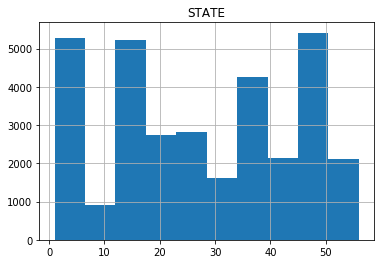

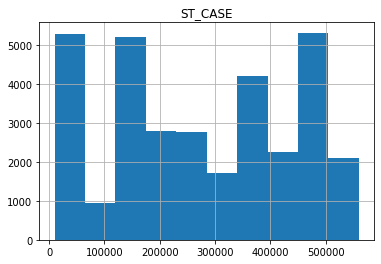

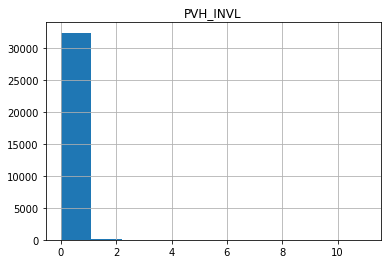

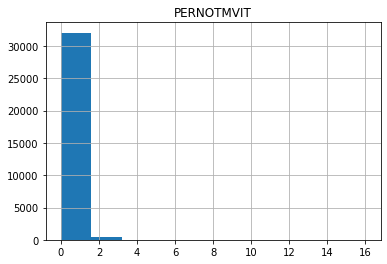

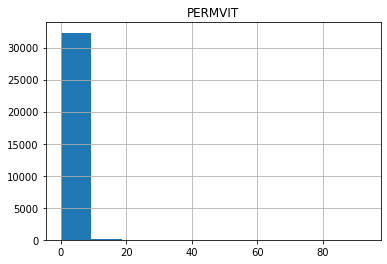

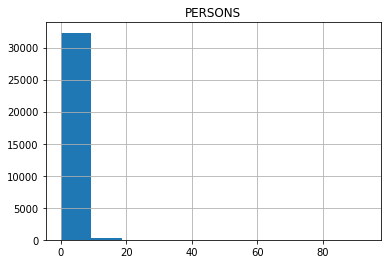

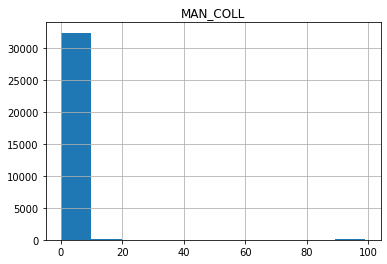

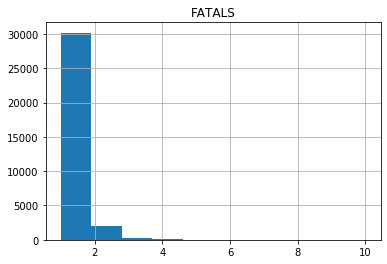

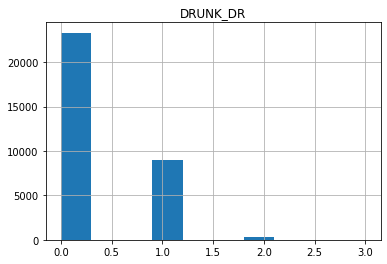

In [16]:
#Lets look at a historgram of each
import matplotlib.pyplot as plt
%matplotlib inline
for col in df_accidents_copy:
    df_accidents_copy.hist(column=col)

In [17]:
#Get Range
for col in df_accidents_copy:
    print(col, df_accidents_copy[col].min(), df_accidents_copy[col].max())

STATE 1 56
ST_CASE 10001 560130
PVH_INVL 0 11
PERNOTMVIT 0 16
PERMVIT 0 93
PERSONS 0 93
MAN_COLL 0 99
FATALS 1 10
DRUNK_DR 0 3


In [18]:
#Get Mean
for col in df_accidents_copy:
    print(col, df_accidents_copy[col].mean())

STATE 27.484049419140696
ST_CASE 275542.1634704038
PVH_INVL 0.035650623885918005
PERNOTMVIT 0.22588972893232528
PERMVIT 2.2825619275923534
PERSONS 2.2913516503780196
MAN_COLL 1.8090847624316184
FATALS 1.0905402913516504
DRUNK_DR 0.29132091708156616


In [19]:
#Calculate correlation
df_accidents_copy.corr()

,STATE,ST_CASE,PVH_INVL,PERNOTMVIT,PERMVIT,PERSONS,MAN_COLL,FATALS,DRUNK_DR
STATE,1.000000,0.999990,-0.008025,-0.055092,0.007066,0.007636,-0.016672,0.009702,0.008524
ST_CASE,0.999990,1.000000,-0.007960,-0.054755,0.007122,0.007693,-0.016699,0.009717,0.008380
PVH_INVL,-0.008025,-0.007960,1.000000,0.161593,-0.012451,0.010068,-0.015146,0.007248,0.028785
PERNOTMVIT,-0.055092,-0.054755,0.161593,1.000000,-0.173519,-0.150076,-0.131004,-0.034331,-0.188258
PERMVIT,0.007066,0.007122,-0.012451,-0.173519,1.000000,0.997428,0.182250,0.277577,-0.038028
PERSONS,0.007636,0.007693,0.010068,-0.150076,0.997428,1.000000,0.180638,0.277606,-0.037846
MAN_COLL,-0.016672,-0.016699,-0.015146,-0.131004,0.182250,0.180638,1.000000,0.035579,-0.044252
FATALS,0.009702,0.009717,0.007248,-0.034331,0.277577,0.277606,0.035579,1.000000,0.046012
DRUNK_DR,0.008524,0.008380,0.028785,-0.188258,-0.038028,-0.037846,-0.044252,0.046012,1.000000


In [20]:
vehiclesToKeep = ["ST_CASE", "MAKE", "MODEL", "MOD_YEAR"]
df_vehicles_copy = df_vehicles[vehiclesToKeep]


#How many unique values?
for column in df_vehicles_copy:
    print(column, len(df_vehicles_copy[column].unique()))

ST_CASE 32166
MAKE 68
MODEL 130
MOD_YEAR 77


In [21]:
df_vehicles_copy

,ST_CASE,MAKE,MODEL,MOD_YEAR
0,10001,12,481,2003
1,10002,49,40,2006
2,10003,20,37,2008
3,10004,12,481,2005
4,10005,69,54,2006
...,...,...,...,...
48918,560128,12,481,1994
48919,560128,20,481,2011
48920,560129,20,421,1996
48921,560129,82,881,2011


In [22]:
df_merge = pd.merge(df_accidents_copy, df_vehicles_copy, on="ST_CASE")

In [23]:
#Get total count of records in accidents frame
len(df_merge.index)

48864

In [24]:
df_merge.head()

,STATE,ST_CASE,PVH_INVL,PERNOTMVIT,PERMVIT,PERSONS,MAN_COLL,FATALS,DRUNK_DR,MAKE,MODEL,MOD_YEAR
0,1,10001,0,0,1,1,0,1,1,12,481,2003
1,1,10002,0,0,1,1,0,1,0,49,40,2006
2,1,10003,0,0,2,2,0,1,1,20,37,2008
3,1,10004,0,0,1,1,0,1,1,12,481,2005
4,1,10005,0,0,2,2,6,1,0,69,54,2006


In [25]:
df_merge.corr()

,STATE,ST_CASE,PVH_INVL,PERNOTMVIT,PERMVIT,PERSONS,MAN_COLL,FATALS,DRUNK_DR,MAKE,MODEL,MOD_YEAR
STATE,1.000000,0.999990,0.000490,-0.030155,0.016373,0.017112,-0.016397,0.013371,-0.007418,-0.028628,0.019859,-0.032821
ST_CASE,0.999990,1.000000,0.000545,-0.029917,0.016389,0.017128,-0.016432,0.013385,-0.007497,-0.028486,0.019870,-0.032706
PVH_INVL,0.000490,0.000545,1.000000,0.250730,0.036870,0.050399,-0.013763,0.014830,0.018699,0.000645,-0.015939,-0.006032
PERNOTMVIT,-0.030155,-0.029917,0.250730,1.000000,-0.078474,-0.062913,-0.122586,-0.008701,-0.137823,0.011758,-0.010446,0.151834
PERMVIT,0.016373,0.016389,0.036870,-0.078474,1.000000,0.999222,0.074447,0.171101,-0.054879,-0.008037,-0.005351,-0.033100
PERSONS,0.017112,0.017128,0.050399,-0.062913,0.999222,1.000000,0.073792,0.172038,-0.054671,-0.007555,-0.005130,-0.033228
MAN_COLL,-0.016397,-0.016432,-0.013763,-0.122586,0.074447,0.073792,1.000000,0.022419,-0.042689,0.032350,0.025632,0.033202
FATALS,0.013371,0.013385,0.014830,-0.008701,0.171101,0.172038,0.022419,1.000000,0.044063,-0.033730,-0.026837,-0.032066
DRUNK_DR,-0.007418,-0.007497,0.018699,-0.137823,-0.054879,-0.054671,-0.042689,0.044063,1.000000,-0.034610,-0.048139,-0.048978
MAKE,-0.028628,-0.028486,0.000645,0.011758,-0.008037,-0.007555,0.032350,-0.033730,-0.034610,1.000000,0.493149,0.315683


In [26]:
df_merge.describe()

,STATE,ST_CASE,PVH_INVL,PERNOTMVIT,PERMVIT,PERSONS,MAN_COLL,FATALS,DRUNK_DR,MAKE,MODEL,MOD_YEAR
count,48864.000000,48864.000000,48864.000000,48864.000000,48864.000000,48864.000000,48864.000000,48864.000000,48864.000000,48864.000000,48864.000000,48864.000000
mean,27.618942,276879.885437,0.033194,0.170944,3.007879,3.016925,2.581860,1.113274,0.277055,36.331839,360.179539,2192.216478
std,16.271162,162650.087618,0.267259,0.483379,3.797021,3.803868,5.929855,0.414472,0.473458,26.227758,304.505627,1209.858447
min,1.000000,10001.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000,1923.000000
25%,12.000000,122163.750000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000,12.000000,37.000000,2001.000000
50%,27.000000,270342.000000,0.000000,0.000000,2.000000,2.000000,1.000000,1.000000,0.000000,30.000000,404.000000,2005.000000
75%,42.000000,420653.000000,0.000000,0.000000,4.000000,4.000000,6.000000,1.000000,1.000000,51.000000,482.000000,2010.000000
max,56.000000,560130.000000,11.000000,16.000000,93.000000,93.000000,99.000000,10.000000,3.000000,99.000000,999.000000,9999.000000


In [27]:
#Get Mode
for col in df_merge:
    print(col, df_merge[col].mode())

STATE 0    48
dtype: int64
ST_CASE 0    260911
dtype: int64
PVH_INVL 0    0
dtype: int64
PERNOTMVIT 0    0
dtype: int64
PERMVIT 0    2
dtype: int64
PERSONS 0    2
dtype: int64
MAN_COLL 0    0
dtype: int64
FATALS 0    1
dtype: int64
DRUNK_DR 0    0
dtype: int64
MAKE 0    12
dtype: int64
MODEL 0    481
dtype: int64
MOD_YEAR 0    2007
dtype: int64


In [28]:
df_merge.mode()
#State 48 is Texas 
#Make #12 is Ford
#Model 481 is "F-Series Pickup"
# https://crashstats.nhtsa.dot.gov/Api/Public/ViewPublication/812559#page=183&zoom=100,0,96

,STATE,ST_CASE,PVH_INVL,PERNOTMVIT,PERMVIT,PERSONS,MAN_COLL,FATALS,DRUNK_DR,MAKE,MODEL,MOD_YEAR
0,48,260911,0,0,2,2,0,1,0,12,481,2007


In [29]:
#Get Range of columns
for col in df_merge:
    print(col, df_merge[col].min(), df_merge[col].max())

STATE 1 56
ST_CASE 10001 560130
PVH_INVL 0 11
PERNOTMVIT 0 16
PERMVIT 0 93
PERSONS 0 93
MAN_COLL 0 99
FATALS 1 10
DRUNK_DR 0 3
MAKE 1 99
MODEL 1 999
MOD_YEAR 1923 9999


In [30]:
#How many unique values?
for column in df_merge:
    print(column, len(df_merge[column].unique()))

STATE 51
ST_CASE 32117
PVH_INVL 10
PERNOTMVIT 12
PERMVIT 37
PERSONS 36
MAN_COLL 11
FATALS 8
DRUNK_DR 4
MAKE 68
MODEL 130
MOD_YEAR 77


In [31]:
df_merge['multi_fatal'] = np.where(df_merge['FATALS']>1, True, False)

In [48]:
df_merge.astype({'MAKE':'str', 'MODEL':'str', 'MOD_YEAR':'str'}).dtypes

STATE           int64
ST_CASE         int64
PVH_INVL        int64
PERNOTMVIT      int64
PERMVIT         int64
PERSONS         int64
MAN_COLL        int64
FATALS          int64
DRUNK_DR        int64
MAKE           object
MODEL          object
MOD_YEAR       object
multi_fatal      bool
dtype: object

In [40]:
df_merge.corr()['multi_fatal']

STATE          0.011934
ST_CASE        0.011929
PVH_INVL       0.011776
PERNOTMVIT    -0.028671
PERMVIT        0.138344
PERSONS        0.138959
MAN_COLL       0.028565
FATALS         0.874814
DRUNK_DR       0.054246
MAKE          -0.038122
MODEL         -0.035546
MOD_YEAR      -0.037795
multi_fatal    1.000000
Name: multi_fatal, dtype: float64

<string>:6: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.


TypeError: numpy boolean subtract, the `-` operator, is deprecated, use the bitwise_xor, the `^` operator, or the logical_xor function instead.

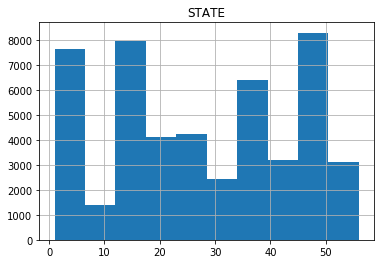

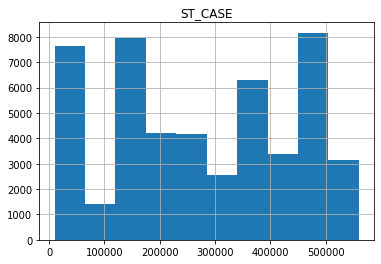

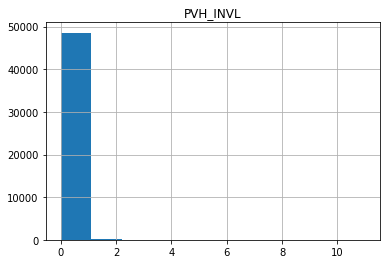

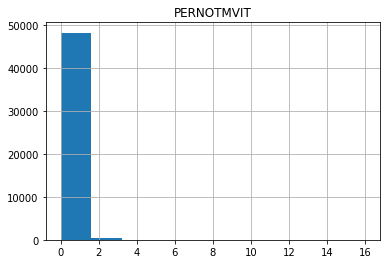

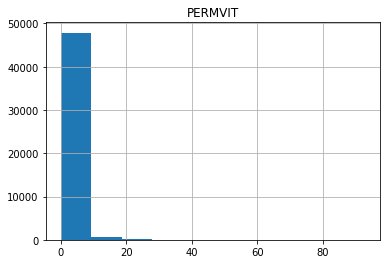

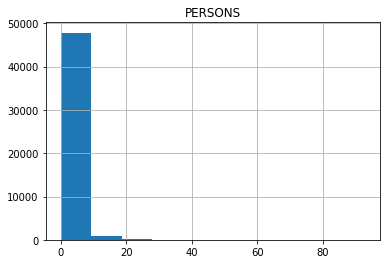

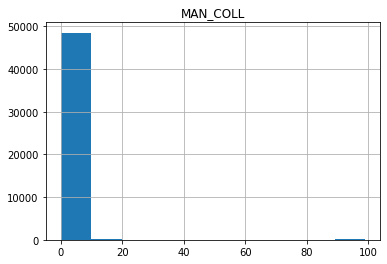

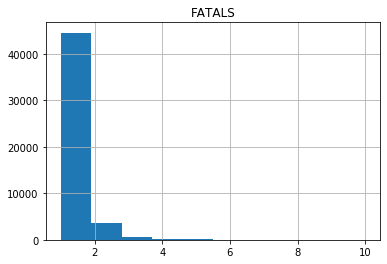

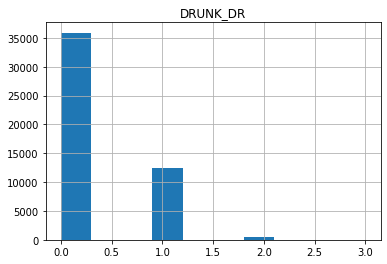

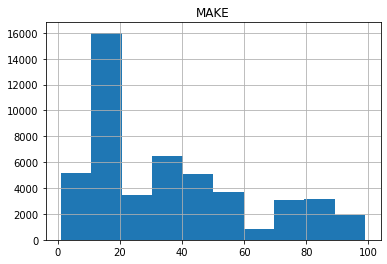

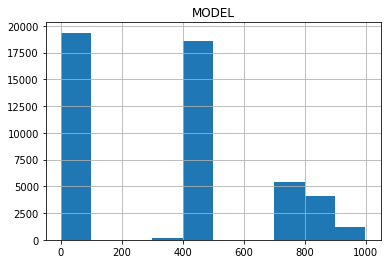

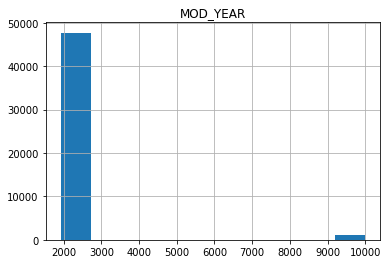

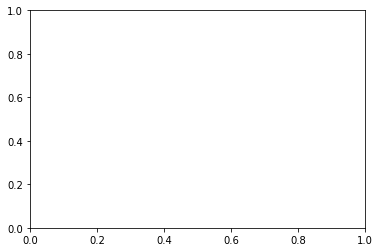

In [41]:
#Lets look at a historgram of each
import matplotlib.pyplot as plt
%matplotlib inline
for col in df_merge:
    df_merge.hist(column=col)

In [42]:
data_mask = np.random.rand(len(df_merge)) < 0.8

In [44]:
df_merge_train = df_merge[data_mask]

In [45]:
df_merge_test = df_merge[~data_mask]

In [46]:
len(df_merge_train)

38833

In [47]:
len(df_merge_test)

10031

In [ ]:
#https://www.analyticsvidhya.com/blog/2015/09/build-predictive-model-10-minutes-python/